# Práctica 2 : Regresión Logística

Guillermo García Patiño Lenza y Mario Quiñones Pérez

In [4]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

## Parte 1:

### Carga y visualización de los datos

In [5]:
def cargaDatos(fichero):
    datos = read_csv(fichero, header = None).to_numpy()
    return datos.astype(float)

In [6]:
def crearGrafica(datos, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    plt.show()

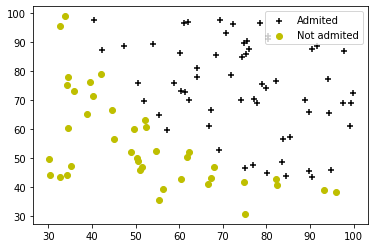

In [7]:
crearGrafica(cargaDatos("ex2data1.csv"), ['Admited', 'Not admited'])

### Funcion Sigmoide

In [8]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

### Cálculo de la función de coste y gradiente

In [9]:
def normalizar(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [10]:
def coste(Theta, X, Y):
    G = sigmoide(np.dot(X, Theta))
    sum1 = np.dot(Y, np.log(G))
    sum2 = np.dot((1-Y), np.log(1 - G))
    return (-1 / X.shape[0]) * (sum1 + sum2)

In [11]:
def gradiente(Theta, X, Y):
    m = X.shape[0]
    G = sigmoide( np.matmul(X,Theta) )
    gradiente  = (1 / len(Y)) * np.matmul(X.T, G - Y)
    return gradiente

In [12]:
def prueba():
    datos = cargaDatos("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    
    X2,mu,sigma = normalizar(X)
    X2 = np.hstack([np.ones([n,1]), X2])
    
    c = coste(np.zeros(X2.shape[1]), X2, Y)
    gr = gradiente(np.zeros(X2.shape[1]),X2,Y)
    print(gr)
    print(c)

In [13]:
prueba()

[-0.1        -0.28122914 -0.25098615]
0.6931471805599453


### Cálculo del valor óptimo de los parámetros

In [69]:
def optimiza(datos = cargaDatos("ex2data1.csv")):
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    
    X_n, mu, sigma = normalizar(X)
    X_n = np.hstack([np.ones([n,1]), X_n])
    T = np.zeros(X.shape[1]+1)
    
    result = opt.fmin_tnc(func = coste, x0 = T, fprime = gradiente, args = (X_n, Y))
    
    c_f = coste(result[0], X_n, Y )
    print(c_f)
    print(result[0])
    
    return result[0]

In [70]:
def optimizaparagrafica(datos = cargaDatos("ex2data1.csv")):
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    
    X = np.hstack([np.ones([n,1]), X])
    m = np.shape(X)[1]
    T = np.zeros([m,1])
    
    result = opt.fmin_tnc(func=coste, x0=T, fprime = gradiente,args=(X, Y))
    
    c_f = coste(result[0], X, Y)
    print(c_f)
    
    theta_opt = result[0]
    return theta_opt

In [15]:
optimiza()

0.20349771564653243
[1.71787865 3.99150584 3.72363972]


array([1.71787865, 3.99150584, 3.72363972])

In [16]:
def frontera(X, Y, theta, plt):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
 
    h = sigmoide(np.c_[np.ones((x1.ravel().shape[0], 1)), x1.ravel(), x2.ravel()].dot(theta))
    h = h.reshape(x1.shape)
    
    plt.contour(x1, x2, h, [0.5], linewidths=1, colors='b')

In [17]:
def crearGraficaConFrontera(datos, Theta, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    
    frontera(X, Y, Theta, plt)
    
    plt.show()

0.20349770158947458


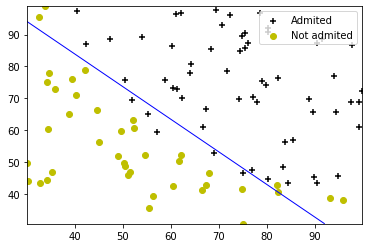

In [18]:
crearGraficaConFrontera(cargaDatos("ex2data1.csv"), optimizaparagrafica(), ['Admited', 'Not admited'])

### Evaluación de la regresión

In [19]:
def evalua(datos, parte_entrenamiento):
    f = round(len(datos) * parte_entrenamiento / 100)
    datos_ent = datos[:f]
    datos_eva = datos[f:]
    
    theta = optimiza(datos_ent)
    
    dat_ev_x = datos_eva[:,:-1]
    dat_ev_y = datos_eva[:,-1]
    
    dat_ev_x_n, mu, sigma = normalizar(dat_ev_x)
    dat_ev_x_n = np.hstack([np.ones([len(datos_eva),1]), dat_ev_x_n])
    
    res_eva = np.dot(dat_ev_x_n, theta)
    res_eva_m = [] 
    for e in map(lambda x : 1 if x >= 0.5 else 0, res_eva):
        res_eva_m.append(e)
        
    iguales = filter(lambda x : dat_ev_y[res_eva_m.index(x)] == x , res_eva_m)
    
    i = 0;
    for e in iguales:
        i = i+1
    
    print("Se ha predicho correctamente el resultado un {}% de las veces".format(i/len(datos_eva) * 100))
    
    return (i/len(datos_eva)*100)

In [20]:
evalua(cargaDatos("ex2data1.csv"), 75)

0.19456570964464878
[0.63167769 4.16277648 3.60606694]
Se ha predicho correctamente el resultado un 48.0% de las veces


48.0

## Parte 2:

### Carga y visualización de datos:

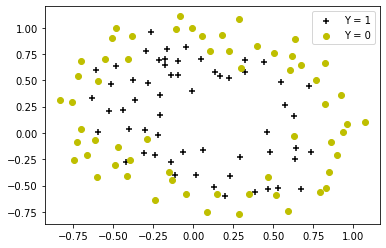

In [21]:
crearGrafica(cargaDatos("ex2data2.csv"), ['Y = 1', 'Y = 0'])

### Mapeo de los atributos:

In [22]:
from sklearn.preprocessing import PolynomialFeatures

def prepara_datos(datos, add):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    X_n, mu, sigma = normalizar(X)
    
    p = PolynomialFeatures(add)
    X2 = p.fit_transform(X_n)
    
    return (X2,Y,mu,sigma)

### Cálculo del coste y el gradiente regularizados

In [23]:
def coste_reg(Theta,X,Y, Lambda):
    c = coste(Theta,X,Y)
    m = X.shape[0]
    e = 0
    
    for t in range(1,len(Theta)):
        e += Theta[t]**2
        
    return c + (Lambda/(2*m))*e

In [24]:
def gradiente_reg(Theta,X,Y,Lambda):
    m = X.shape[0]
    gr = gradiente(Theta,X,Y)
    theta2 = (Lambda/m)*Theta
    return (gr + theta2)

In [25]:
def prueba2():
    datos = cargaDatos("ex2data2.csv")
    X, Y, mu, sigma = prepara_datos(datos, 6)
   
    Theta = np.zeros(X.shape[1])
    
    c = coste_reg(Theta,X,Y,1)
    gr = gradiente_reg(Theta,X,Y,1)
   
    print(gr)
    print(c)

In [26]:
prueba2()

[ 0.00847458  0.03705198 -0.00284799  0.19753354  0.03181133  0.14157707
  0.08474569 -0.02197759  0.01912472  0.01978675  0.60552761 -0.01178425
  0.17516318 -0.00748334  0.41389202  0.32662613 -0.08620202  0.03911234
 -0.02213139  0.05549666  0.01571     1.78985126 -0.11770386  0.34722535
 -0.07226827  0.2933989  -0.11751531  1.15773589]
0.6931471805599453


### Cálculo de los valores óptimos:

In [27]:
def preparaFunciones(Lambda):
    c = lambda Theta,X,Y : coste_reg(Theta,X,Y,Lambda)
    gr = lambda Theta,X,Y : gradiente_reg(Theta,X,Y,Lambda)
    
    return (c,gr)

In [48]:
def optimiza_reg(datos,Lambda):
    X, Y, mu, sigma = prepara_datos(datos,6)
    c, gr = preparaFunciones(Lambda)
    
    T = np.zeros(X.shape[1])

    result = opt.fmin_tnc(func = c, x0 = T, fprime = gr, args = (X, Y))
    c_f = coste(result[0], X, Y)
    print("coste:", c_f)
    return result[0]

In [68]:
datos = cargaDatos("ex2data2.csv")
optimiza_reg(datos, 1)

coste: 0.31064314472446225


array([ 1.7903008 , -0.20810284,  0.35766677,  0.34424822, -0.36085601,
        0.20176854,  0.16024196,  0.28060681,  0.06676788, -0.30579355,
        0.30662686, -0.00676247, -0.57664467, -0.51383133, -0.19082302,
       -0.05641764, -0.07118331,  0.82605945, -0.34853422, -0.44094965,
       -0.05126368, -0.44397464, -0.1982422 , -0.46715723,  0.01152511,
       -0.87767704, -0.6908056 , -0.33307882])

In [62]:
def optimiza_reg_paragrafica(datos,Lambda):
    X_aux = datos[:,:-1]
    Y = datos[:,-1]
    
    p = PolynomialFeatures(6)
    X = p.fit_transform(X_aux)
    
    c, gr = preparaFunciones(Lambda)
    
    T = np.zeros(X.shape[1])

    result = opt.fmin_tnc(func = c, x0 = T, fprime = gr, args = (X, Y))
    c_f = coste(result[0], X, Y)
    print("coste:", c_f)
    return result[0]

In [63]:
def crearGraficaConFrontera2(datos, Theta, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    
    frontera2(X, Y, Theta, PolynomialFeatures(6), plt)
    
    plt.show()

In [64]:
def frontera2(X, Y, theta, poly, plt):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')

coste: 0.46822079610635636


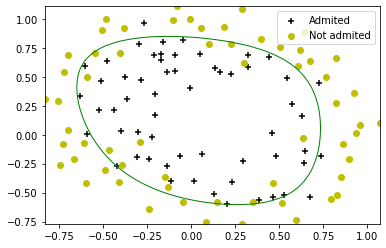

In [67]:
datos = cargaDatos("ex2data2.csv")
crearGraficaConFrontera2(datos, optimiza_reg_paragrafica(datos, 1), ['Admited', 'Not admited'])

### Efectos de la regularizacion:

In [45]:
def evalua_reg(datos, parte_entrenamiento, Lambda):
    f = round(len(datos) * parte_entrenamiento / 100)
    datos_ent = datos[:f]
    datos_eva = datos[f:]
    
    theta = optimiza_reg(datos_ent,Lambda)
    
    dat_ev_x_n , dat_ev_y, mu, sigma = prepara_datos(datos_eva,6)
    
    res_eva = np.dot(dat_ev_x_n, theta)
    res_eva_m = [] 
    for e in map(lambda x : 1 if x >= 0.5 else 0, res_eva):
        res_eva_m.append(e)
        
    iguales = filter(lambda x : dat_ev_y[res_eva_m.index(x)] == x , res_eva_m)
    
    i = 0;
    for e in iguales:
        i = i+1
    
    return (i/len(datos_eva)*100)

In [46]:
def grafica_ev():
    datos = cargaDatos("ex2data2.csv")
    X = []
    Y = []
    for i in range(1,100):
        X.append(i)
        Y.append(evalua_reg(datos,75,i))
    
    plt.figure()
    plt.plot(X,Y)
    plt.show()

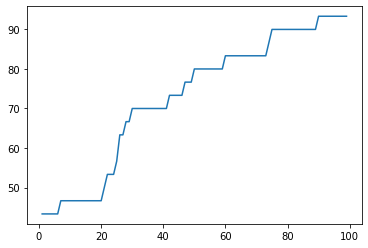

In [47]:
grafica_ev()